# EDA for Deep Learning Challenge#2

This is a basic Exploratory Data Analysis for the Deep Learning challenge#2 conducted by Hackerarth.

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

We import our train data to a DataFrame called `train` using pandas.

In [3]:
train.head()

,row_id,age,gender,view_position,image_name,detected
0,id_0,45,M,0,scan_0000.png,class_3
1,id_1,57,F,0,scan_0001.png,class_3
2,id_10,58,M,0,scan_00010.png,class_3
3,id_1000,64,M,0,scan_0001000.png,class_6
4,id_10000,33,M,1,scan_00010000.png,class_3


Our data consists of six unique attributes.

In [4]:
train.shape

(18577, 6)

In [5]:
train['row_id'].nunique()

18577

In [6]:
train['image_name'].nunique()

18577

The `row_id` and `image_name` attributes are unique for each row. We cannot infer any useful information from these attributes.

## Age

To start off, we use a box plot to visualize the data distribution of ages.

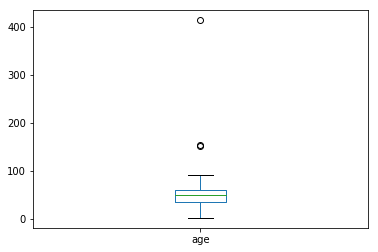

In [7]:
train['age'].plot(kind='box')
plt.show()

In the plot, we can observe that there are a few data points whoose ages are greater than 100. There is even an age which is greater than 400. These are outliers and skewer the distribution of the dataset. We remove these data points for this analysis.

In [8]:
train.drop(train[train['age']>100].index,inplace=True)

We plot the `age` attribute again.

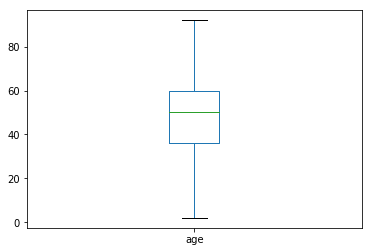

In [9]:
train['age'].plot(kind='box')
plt.show()

Now we can see a more even distribution of ages. Next we plot a histogram to better visualize this data.

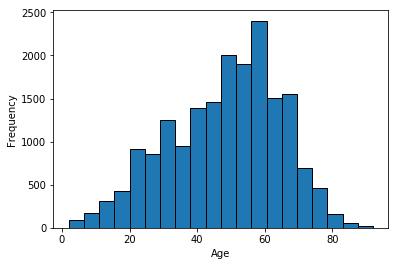

In [10]:
train['age'].plot(kind='hist',bins=20,edgecolor='black')
plt.xlabel('Age')
plt.show()

The highest distribution of ages lies between 40 and 60.

We can further explore this data by seperating it into male and female data using the `gender` attribute.

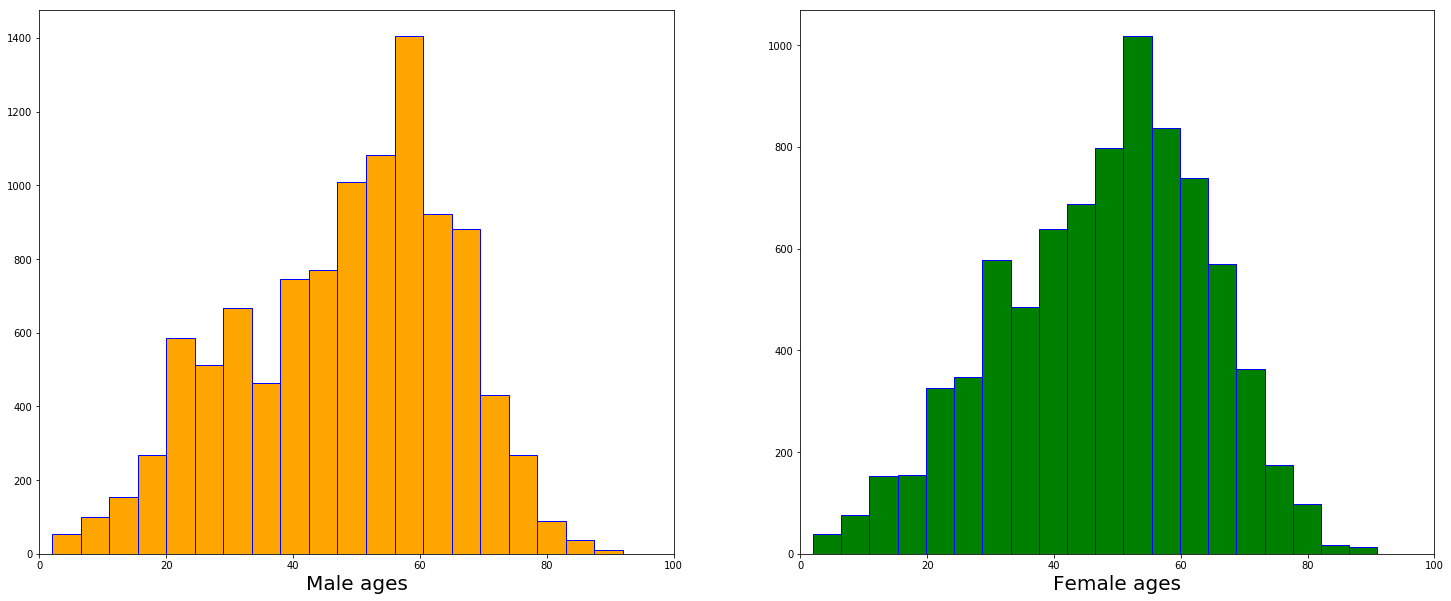

In [11]:
male = train[train['gender']=='M']
female = train[train['gender']=='F']
fig=plt.figure(figsize=(25,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.hist(male['age'],color='orange',bins=20,edgecolor='b')
ax1.set_xlim(0,100)
ax1.set_xlabel('Male ages',fontsize=20)
ax2.hist(female['age'],color='green',bins=20,edgecolor='b')
ax2.set_xlim(0,100)
ax2.set_xlabel('Female ages',fontsize=20)
plt.show()

In [12]:
male['age'].median(), female['age'].median(), train['age'].median()

(51.0, 49.0, 50.0)

In [13]:
male['age'].mean(), female['age'].mean(), train['age'].mean()

(48.145546636085626, 47.67854500616523, 47.94163885000538)

Here we can compare the means and medians of all `age` data.

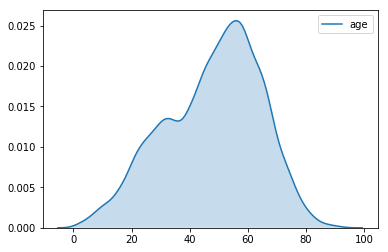

In [14]:
sns.kdeplot(train['age'],shade=True)
plt.show()

This is the Kernal density estimate plot for the `age` data.

## Gender

We explore the distribution of `gender` data in this section.

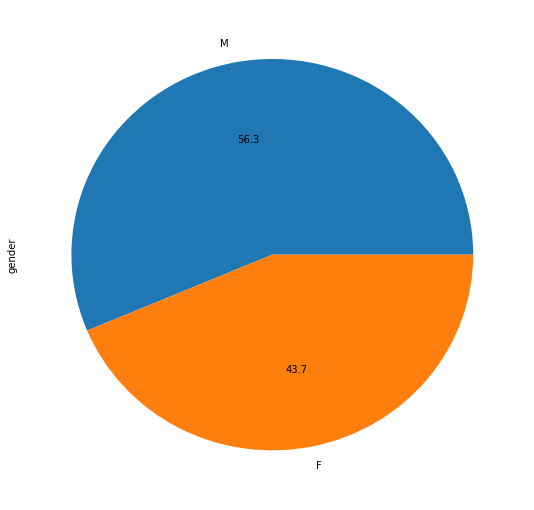

In [15]:
fig=plt.figure(figsize=(9,9))
train['gender'].value_counts().plot(kind='pie',autopct='%.1f')
plt.show()

In [16]:
train['gender'].value_counts()

M    10464
F     8110
Name: gender, dtype: int64

Males consist of 56.3% of the data while females make up the rest.

## View Position

We analyse the `view_position` attribute in this section.

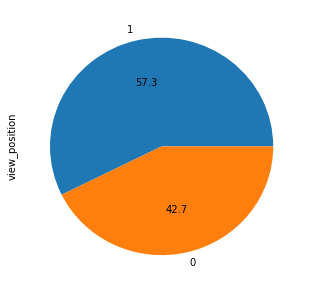

In [17]:
fig=plt.figure(figsize=(5,5))
train['view_position'].value_counts().plot(kind='pie',autopct='%.1f')
plt.show()

In [18]:
train['view_position'].value_counts()

1    10649
0     7925
Name: view_position, dtype: int64

We have two view positions in the dataset, `0` and `1`. This refers to the positon in which the x-ray was taken. 57.3% of the x-rays were taken in one position while the remaining were taken in another.

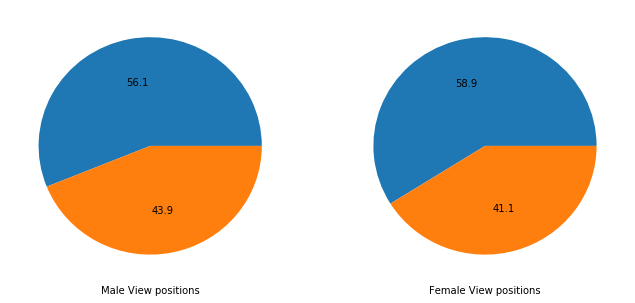

In [19]:
fig=plt.figure(figsize=(11,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.pie(male['view_position'].value_counts(),autopct='%.1f')
ax2.pie(female['view_position'].value_counts(),autopct='%.1f')
ax1.set_xlabel('Male View positions')
ax2.set_xlabel('Female View positions')
plt.show()

This is the distribution of `view_positions` by genders.

## Detected

This is our target variable.

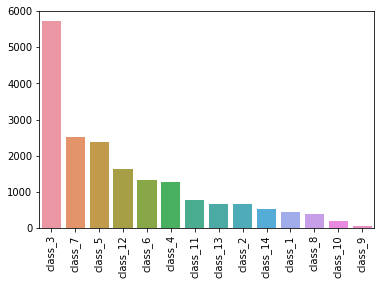

In [20]:
detected = train['detected'].value_counts()
sns.barplot(detected.index,detected.values)
plt.xticks(rotation=90)
plt.show()

Here we can obsereve that `class_3` has the highest count. It is almost equal to the sum of the next two largest classes.

In [21]:
train['detected'].value_counts()

class_3     5727
class_7     2528
class_5     2373
class_12    1623
class_6     1316
class_4     1283
class_11     786
class_13     676
class_2      656
class_14     535
class_1      436
class_8      376
class_10     193
class_9       66
Name: detected, dtype: int64

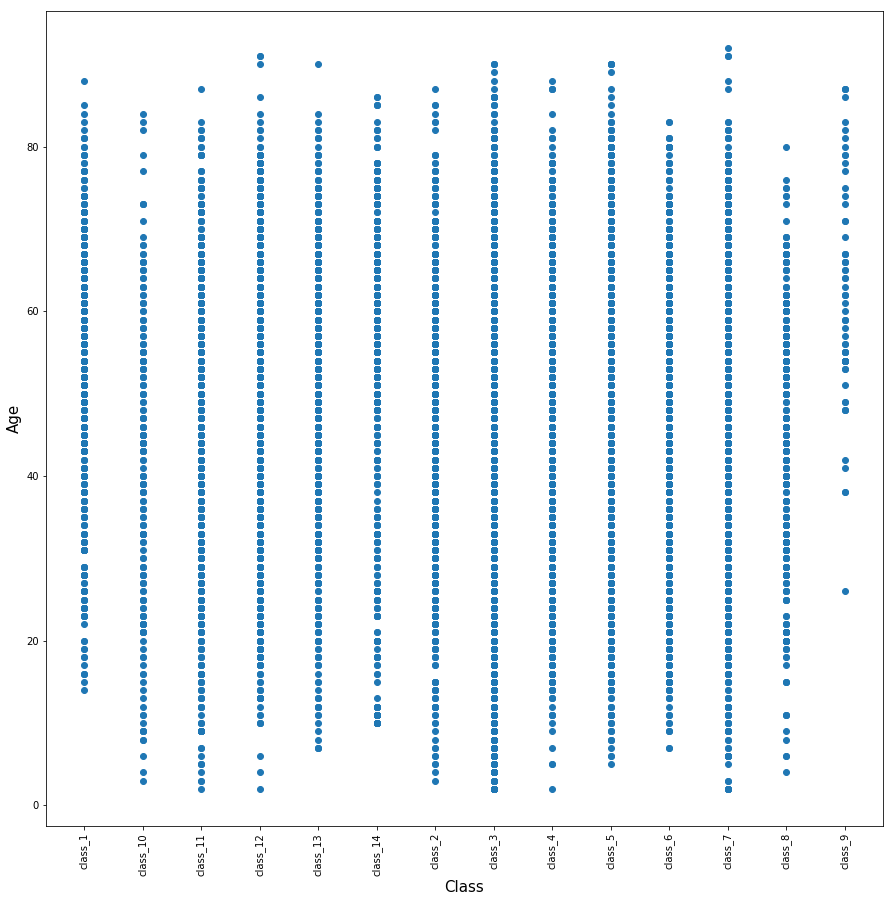

In [22]:
fig=plt.figure(figsize=(15,15))
plt.scatter(train['detected'],train['age'])
plt.xticks(rotation=90)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.show()

From this scatter plot of `detected` and `age` we can infer that `class_9`(Hernia) generally occurs in people aged 45 or more. We can also see that `class_1`(Fibrosis) and `class_14`(Emphysema) generally do not occur in kids aged 10 or less.

## Conclusion

This is a basic EDA performed on the csv datafiles. A more in-depth analysis can be conducted based on your requirements.